In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.loc[:, train.isnull().mean() < 0.5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [7]:
percent_amount = (train.notna().sum() / len(train)) * 100
percent_amount

Id               100.000000
MSSubClass       100.000000
MSZoning         100.000000
LotFrontage       82.260274
LotArea          100.000000
                    ...    
MoSold           100.000000
YrSold           100.000000
SaleType         100.000000
SaleCondition    100.000000
SalePrice        100.000000
Length: 81, dtype: float64

In [8]:
percent_amount.sort_values(ascending=True).head(20)

PoolQC            0.479452
MiscFeature       3.698630
Alley             6.232877
Fence            19.246575
MasVnrType       40.273973
FireplaceQu      52.739726
LotFrontage      82.260274
GarageYrBlt      94.452055
GarageType       94.452055
GarageFinish     94.452055
GarageQual       94.452055
GarageCond       94.452055
BsmtExposure     97.397260
BsmtFinType2     97.397260
BsmtFinType1     97.465753
BsmtCond         97.465753
BsmtQual         97.465753
MasVnrArea       99.452055
Electrical       99.931507
KitchenQual     100.000000
dtype: float64

In [9]:
missing_drop = percent_amount.sort_values(ascending=True).head(6).index
train.drop(columns=missing_drop, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
# Calculate the percentage of non-missing values and sort to get the top 20 columns with the most missing values
(train.notna().mean() * 100).sort_values(ascending=True).head(20)

LotFrontage      82.260274
GarageType       94.452055
GarageYrBlt      94.452055
GarageFinish     94.452055
GarageQual       94.452055
GarageCond       94.452055
BsmtFinType2     97.397260
BsmtExposure     97.397260
BsmtCond         97.465753
BsmtQual         97.465753
BsmtFinType1     97.465753
MasVnrArea       99.452055
Electrical       99.931507
BsmtHalfBath    100.000000
BsmtFullBath    100.000000
HalfBath        100.000000
BedroomAbvGr    100.000000
GrLivArea       100.000000
LowQualFinSF    100.000000
2ndFlrSF        100.000000
dtype: float64

In [11]:
# Calculate the percentage of non-missing values for each column
percent_non_missing = (train.notna().mean() * 100)

# Get a list of columns where the percentage of non-missing values is less than 100
cols_missing = [col for col in train.columns if percent_non_missing[col] < 100]
cols_missing

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [12]:
train[cols_missing].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [13]:
# Identify numerical columns (integers and floats)
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]

# Identify categorical columns (object type)
categorical_cols = [col for col in train.columns if train[col].dtype == 'object']

# Calculate the median for numerical columns and fill missing values with the median
for col in numerical_cols:
    median = train[col].median()
    train[col].fillna(median, inplace=True)

# Calculate the mode for categorical columns and fill missing values with the mode
for col in categorical_cols:
    mode = train[col].mode()[0]  # mode() returns a Series, select the first element
    train[col].fillna(mode, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
(train.notna().mean() * 100).sort_values(ascending=True).head(20)

Id              100.0
Functional      100.0
TotRmsAbvGrd    100.0
KitchenQual     100.0
KitchenAbvGr    100.0
BedroomAbvGr    100.0
HalfBath        100.0
FullBath        100.0
BsmtHalfBath    100.0
BsmtFullBath    100.0
GrLivArea       100.0
LowQualFinSF    100.0
2ndFlrSF        100.0
1stFlrSF        100.0
Electrical      100.0
CentralAir      100.0
Fireplaces      100.0
HeatingQC       100.0
GarageType      100.0
GarageFinish    100.0
dtype: float64

In [99]:
len(numerical_cols), len(categorical_cols)

(38, 37)

## Visualizations

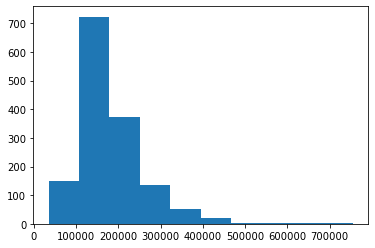

In [100]:
plt.hist(train['SalePrice'])
plt.show()

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

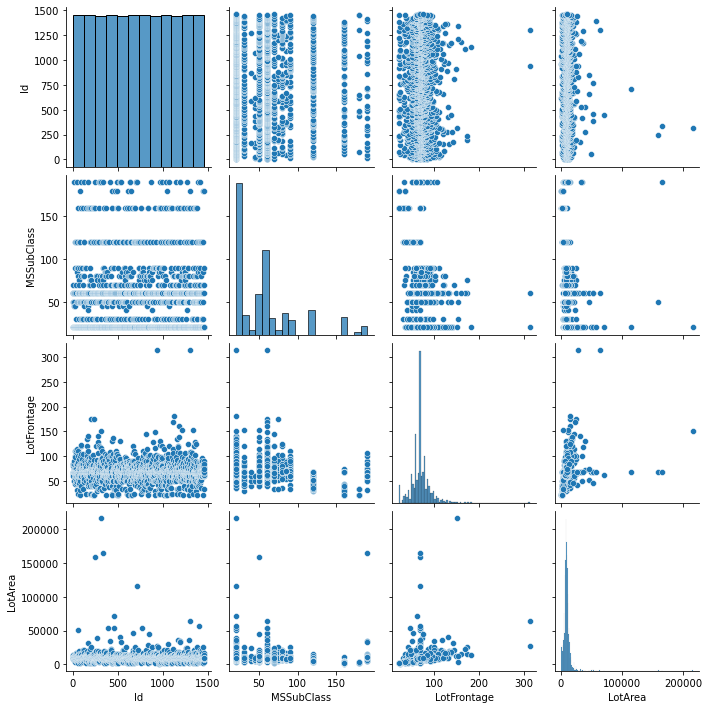

In [106]:
sns.pairplot(train[train.columns[:10]])

## Explore Numerical Features

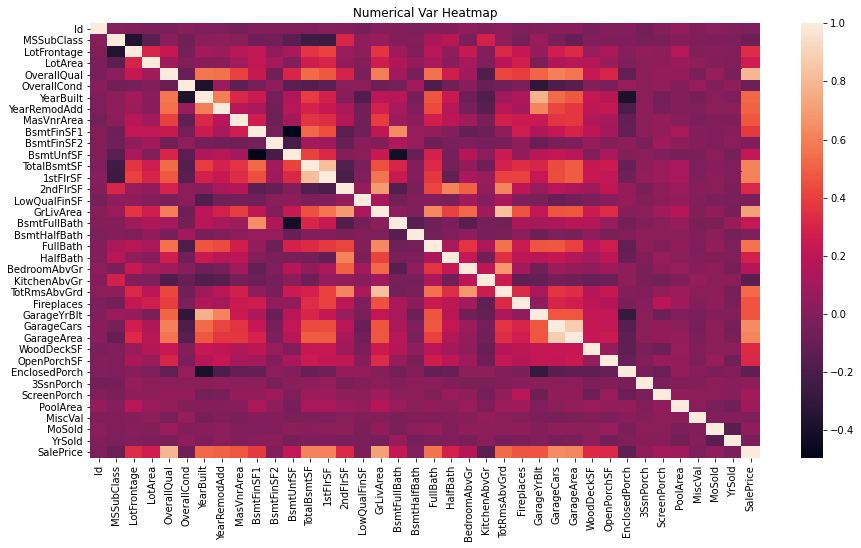

In [15]:
# Correlation
corr_mat = train[numerical_cols].corr()

# Plot
plt.figure(figsize = (15, 8))
sns.heatmap(corr_mat)
plt.title("Numerical Var Heatmap")
plt.show()

In [16]:
high_corr_num = corr_mat.SalePrice[abs(corr_mat['SalePrice']) > 0.4]
high_corr_num

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.466754
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [17]:
train[high_corr_num.index]

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500
3,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,1999.0,2,460,175000
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,1978.0,2,500,210000
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,1941.0,1,252,266500
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,1950.0,1,240,142125


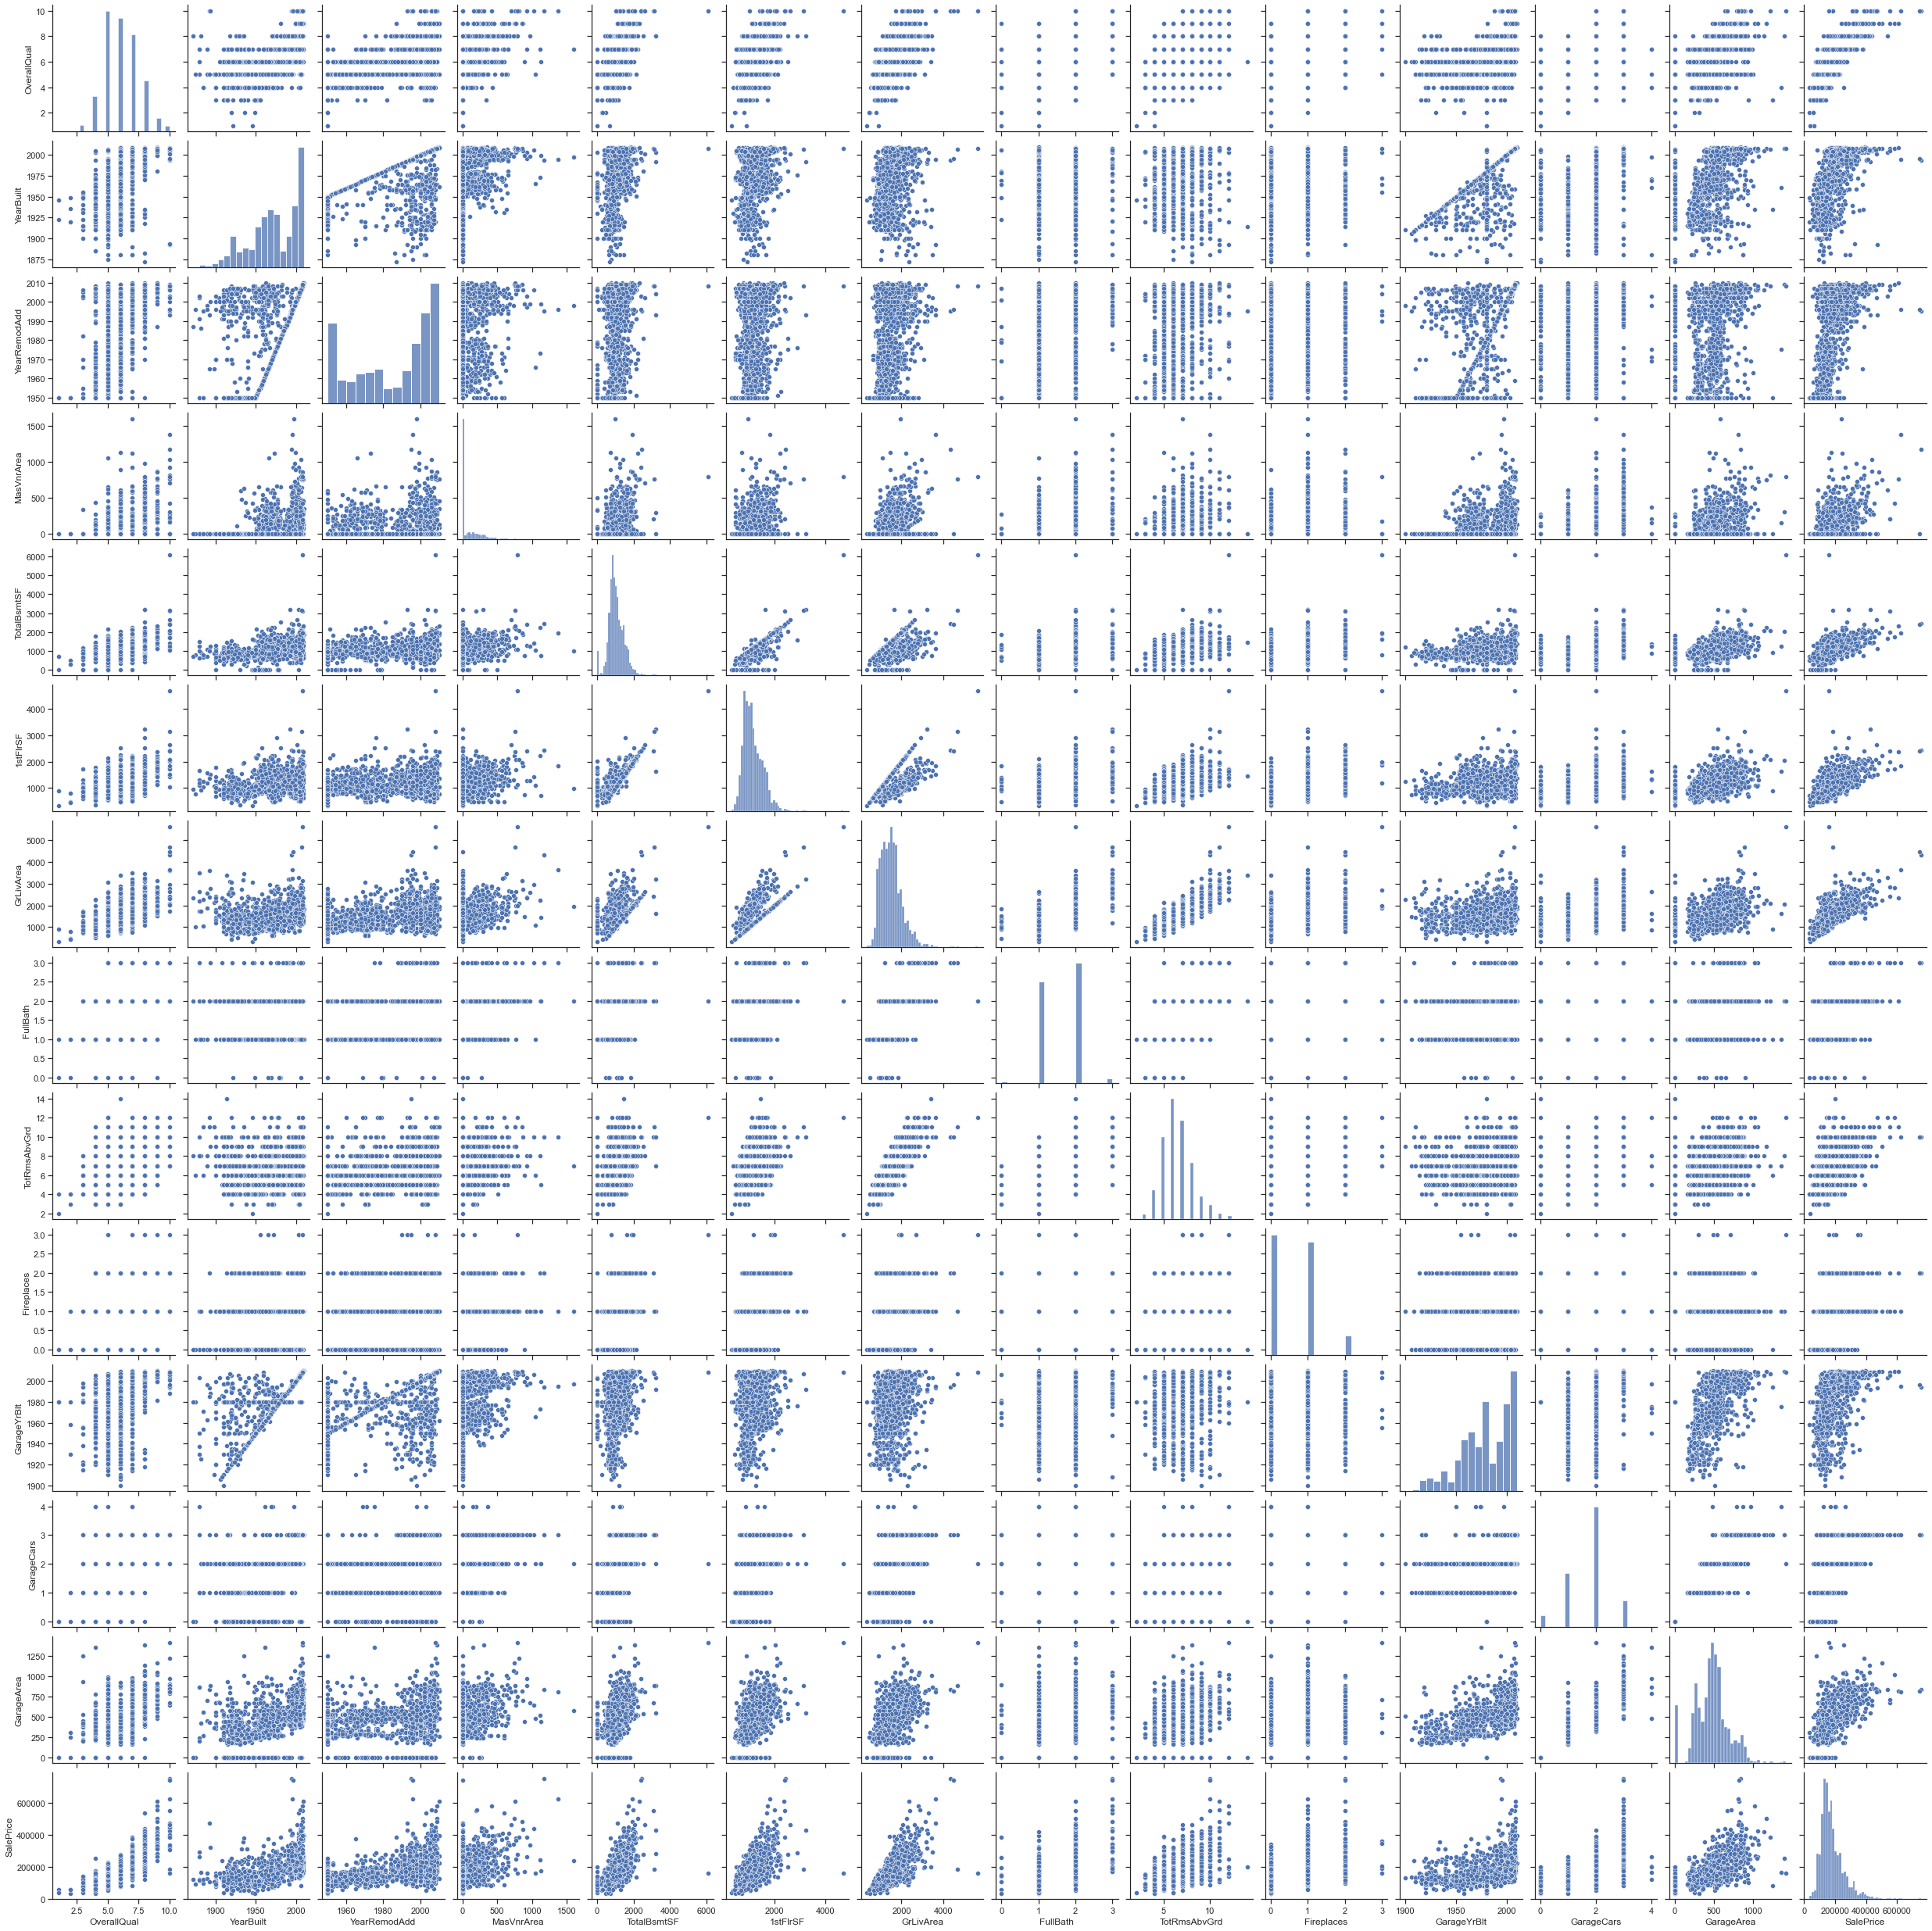

In [18]:
# sns.set(style="ticks")
# pairplot = sns.pairplot(train[high_corr_num.index])
# pairplot.savefig('pairplot.png')  # Save the pairplot as an image file

# Display the saved image
from IPython.display import Image
Image('pairplot.png')

In [19]:
# Build naive model to understand feature importance
numerical_cols = numerical_cols[1:] # Dropping ID
train[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [20]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [21]:
# split
X = train[numerical_cols].drop('SalePrice', axis=1)
y = train['SalePrice']

X.shape, y.shape

((1460, 36), (1460,))

In [22]:
# Scale
sc = StandardScaler()

X = sc.fit_transform(X)

X[:5, :5]

array([[ 0.07337496, -0.22087509, -0.20714171,  0.65147924, -0.51719981],
       [-0.87256276,  0.46031974, -0.09188637, -0.07183611,  2.17962776],
       [ 0.07337496, -0.08463612,  0.07347998,  0.65147924, -0.51719981],
       [ 0.30985939, -0.44794003, -0.09689747,  0.65147924, -0.51719981],
       [ 0.07337496,  0.64197169,  0.37514829,  1.3747946 , -0.51719981]])

In [23]:
# fit model

xgb_model = XGBRegressor()
xgb_model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
# Get feature importances
feature_importances = xgb_model.feature_importances_

# Pair feature names with their importances
feature_importance_dict = dict(zip(numerical_cols, feature_importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

In [25]:
# Print feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

OverallQual: 0.5811314582824707
KitchenAbvGr: 0.10375650227069855
GarageCars: 0.0907229632139206
GrLivArea: 0.042653460055589676
FullBath: 0.03738483414053917
2ndFlrSF: 0.0221883412450552
TotalBsmtSF: 0.01570395939052105
Fireplaces: 0.012376518920063972
BsmtFinSF1: 0.011749370954930782
1stFlrSF: 0.011275595985352993
OpenPorchSF: 0.008554277941584587
OverallCond: 0.007052005268633366
YearRemodAdd: 0.006757310125976801
YearBuilt: 0.006432672031223774
GarageArea: 0.00506167346611619
LotArea: 0.0037092294078320265
HalfBath: 0.0035273039247840643
BsmtFullBath: 0.0028205811977386475
TotRmsAbvGrd: 0.0023359637707471848
WoodDeckSF: 0.002295691054314375
BsmtFinSF2: 0.0022677499800920486
ScreenPorch: 0.0022671082988381386
LotFrontage: 0.0020734057761728764
GarageYrBlt: 0.0019690473563969135
MoSold: 0.0018203386571258307
BsmtUnfSF: 0.0016541203949600458
PoolArea: 0.0014433382311835885
BsmtHalfBath: 0.0013293935917317867
MasVnrArea: 0.0012566832592710853
BedroomAbvGr: 0.0012343664420768619
3SsnPor

In [26]:
high_feature_num = [feature for feature, importance in sorted_feature_importances if importance > 0.005]
high_feature_num

['OverallQual',
 'KitchenAbvGr',
 'GarageCars',
 'GrLivArea',
 'FullBath',
 '2ndFlrSF',
 'TotalBsmtSF',
 'Fireplaces',
 'BsmtFinSF1',
 '1stFlrSF',
 'OpenPorchSF',
 'OverallCond',
 'YearRemodAdd',
 'YearBuilt',
 'GarageArea']

In [27]:
# Assuming high_corr_num and high_feature_num are lists containing feature names
high_corr_set = set(high_corr_num.index)
high_feature_set = set(high_feature_num)

# Find the intersection (common elements) between the two sets
common_elements = high_corr_set.intersection(high_feature_set)

In [28]:
common_elements

{'1stFlrSF',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

## Categorical features

In [29]:
train[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

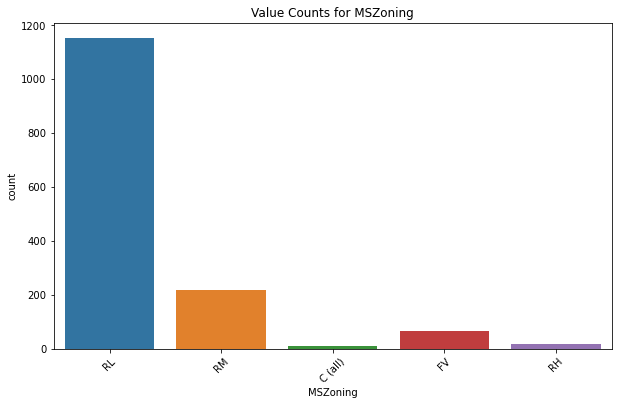

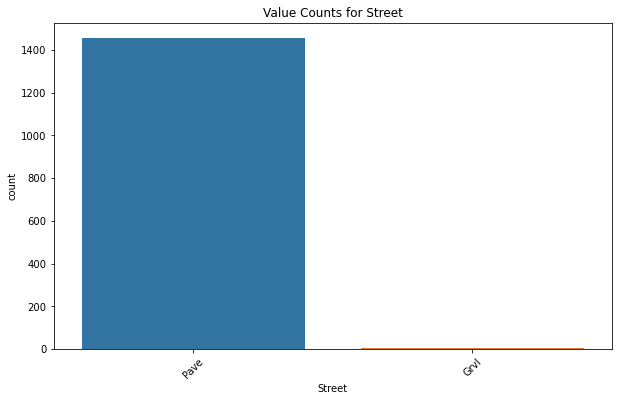

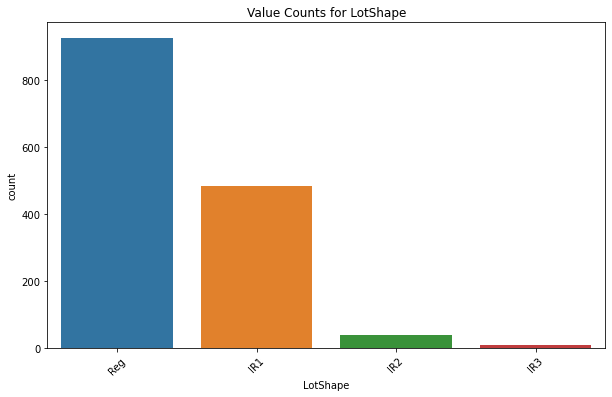

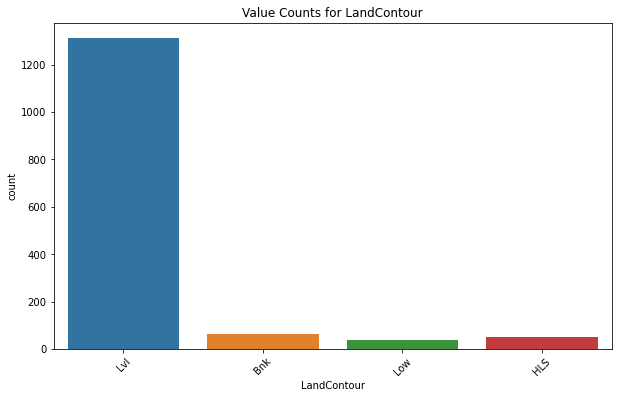

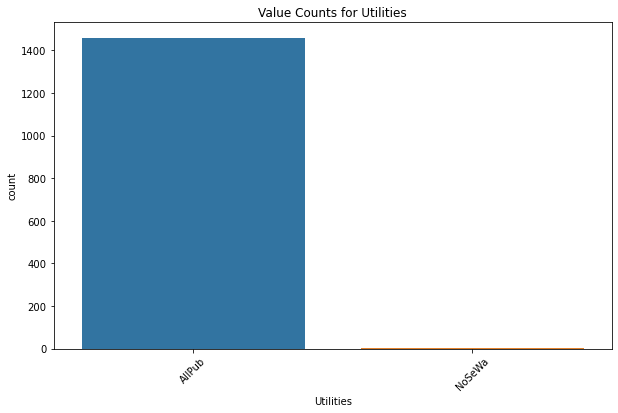

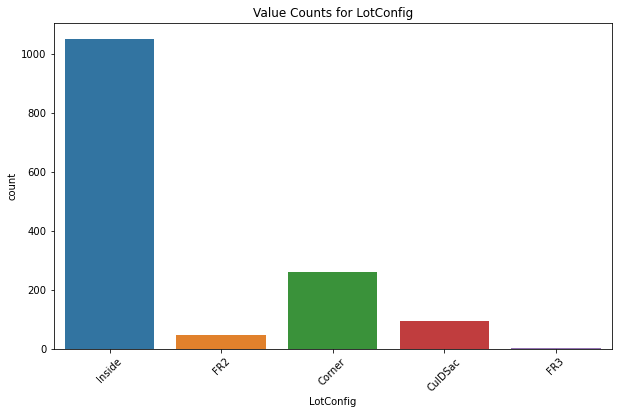

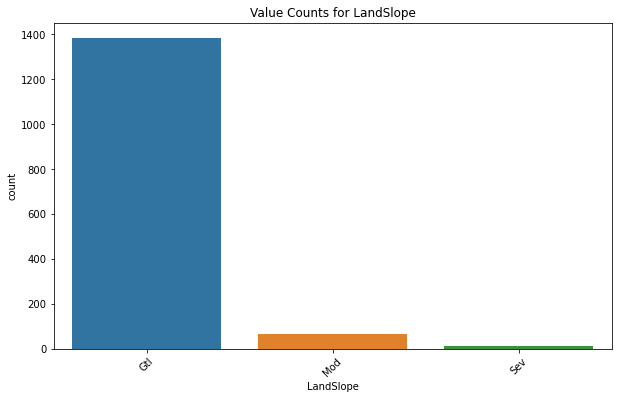

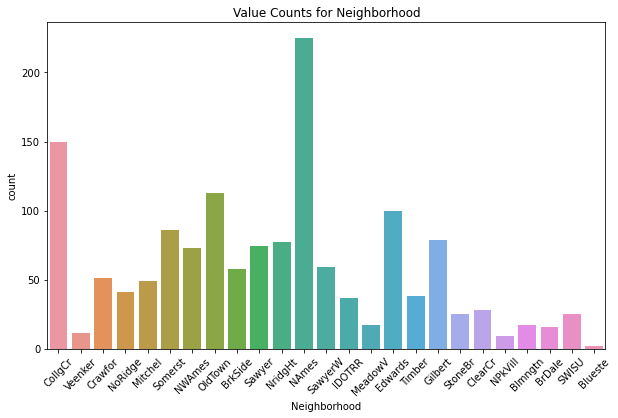

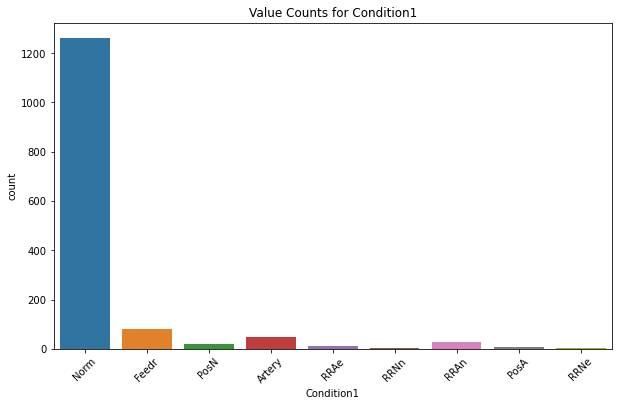

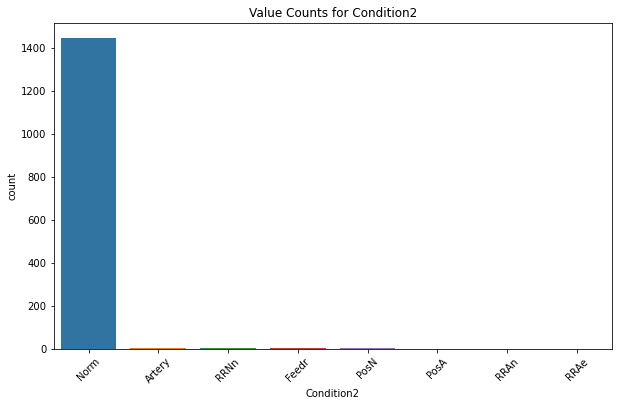

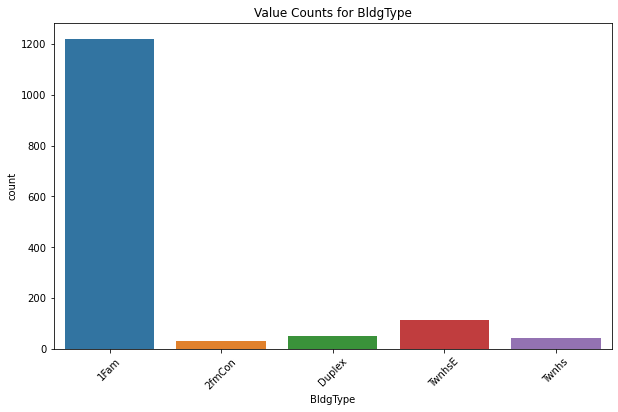

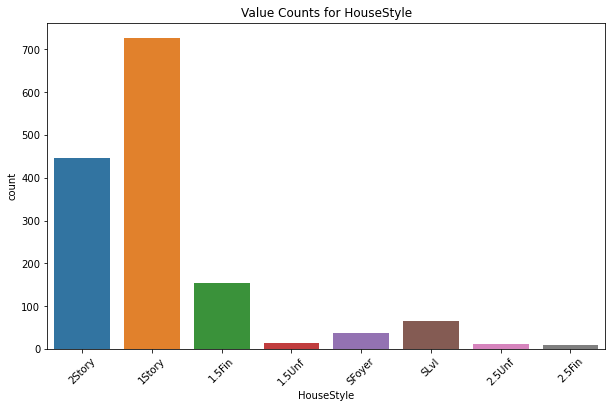

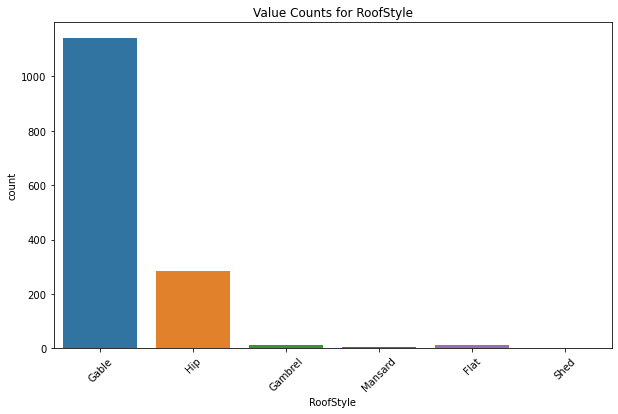

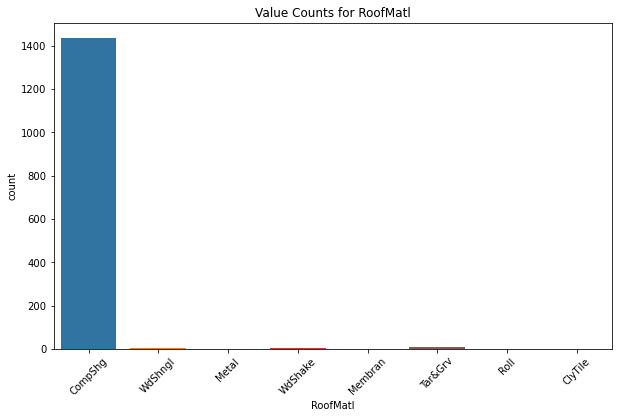

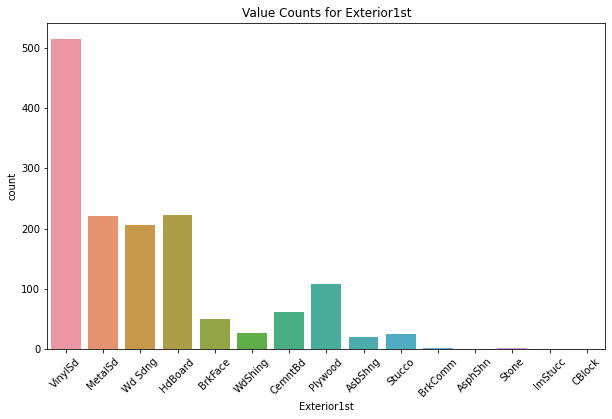

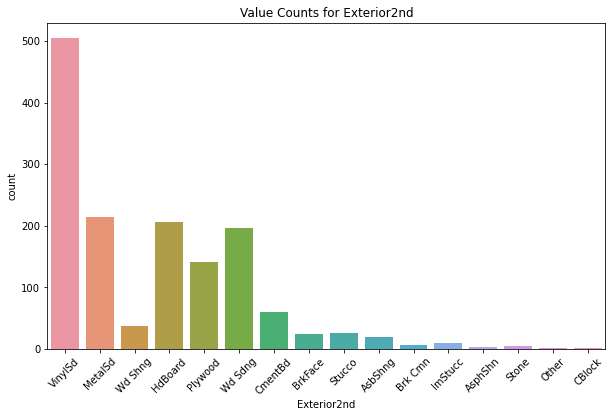

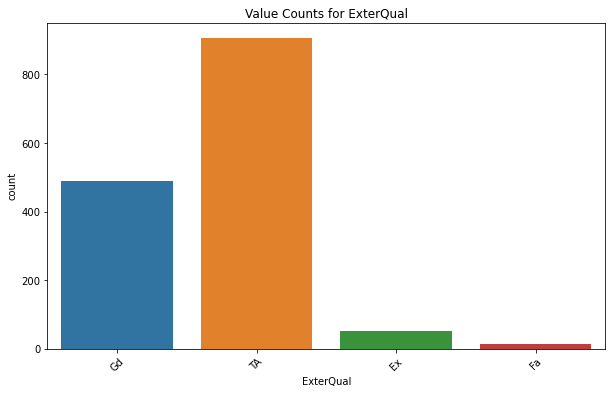

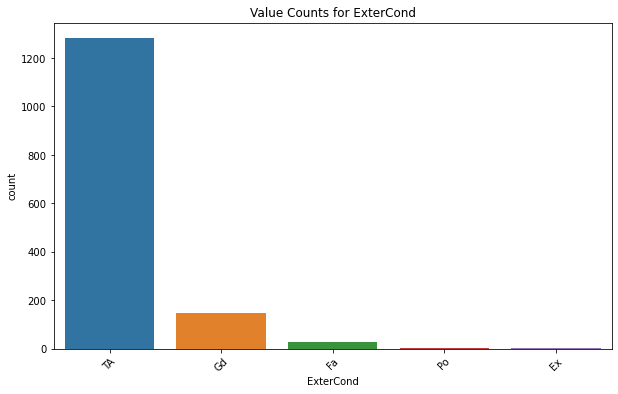

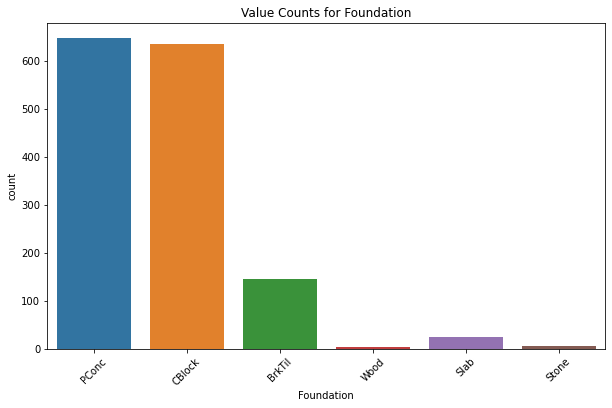

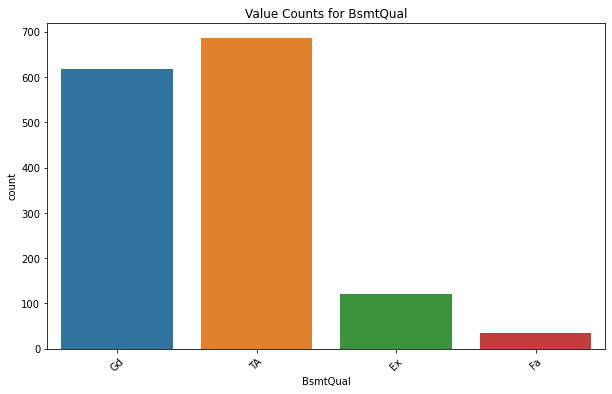

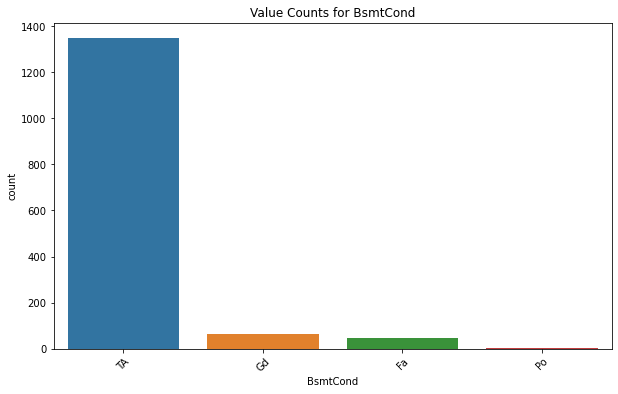

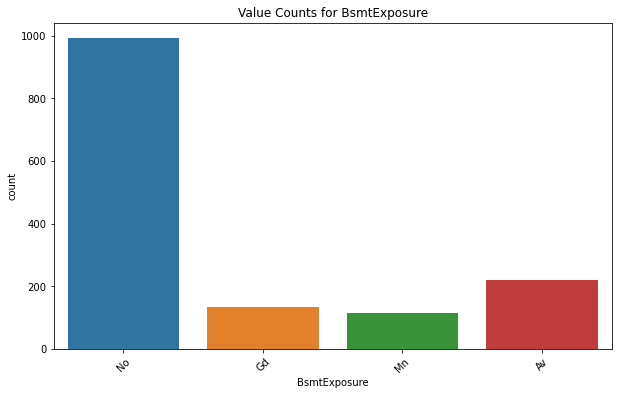

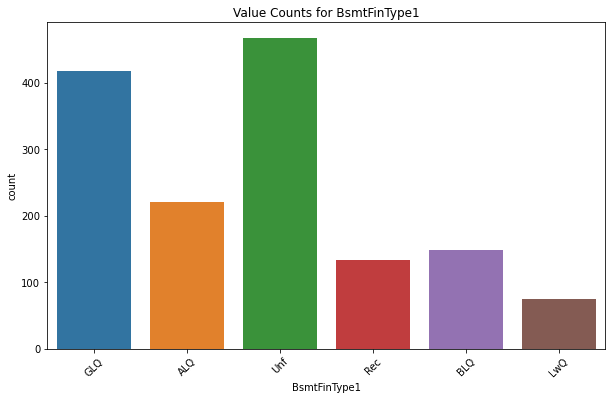

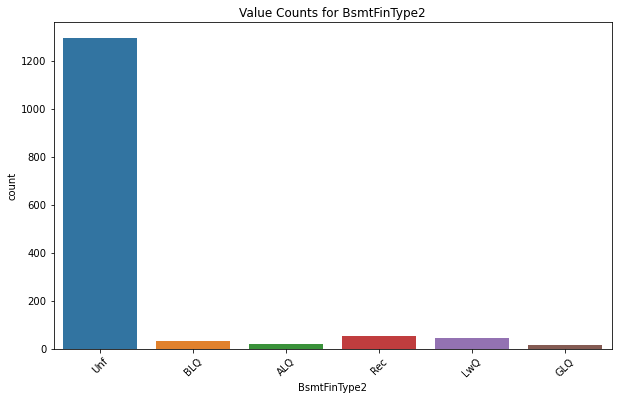

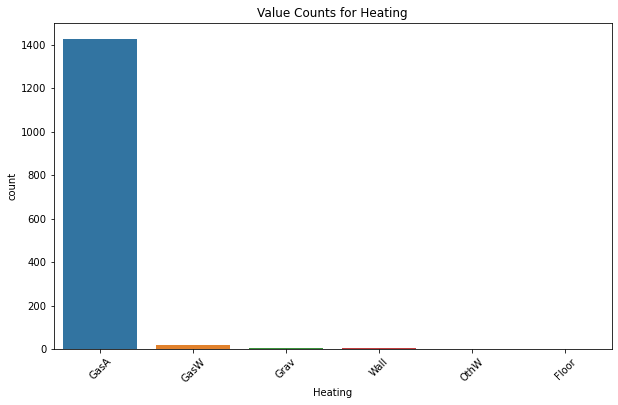

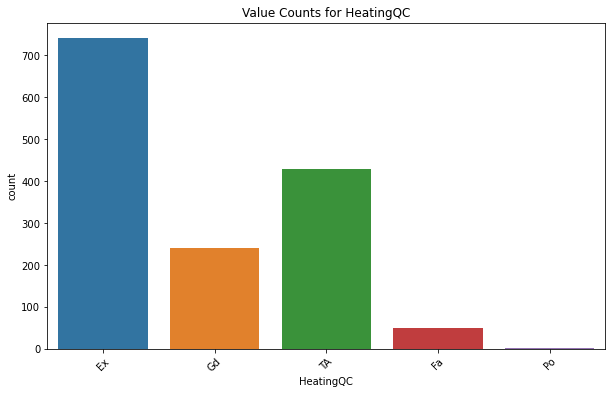

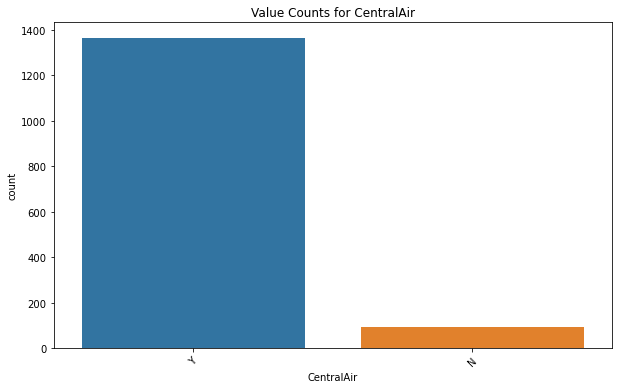

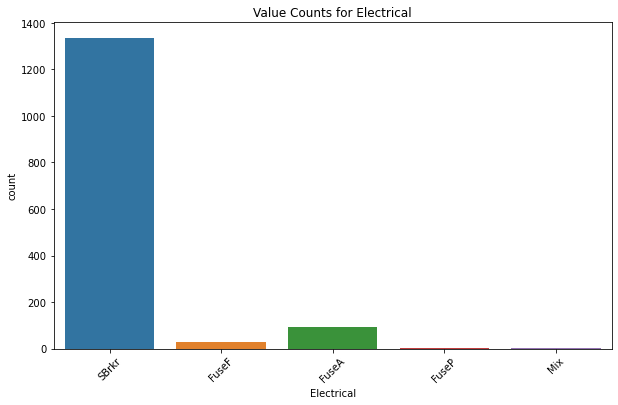

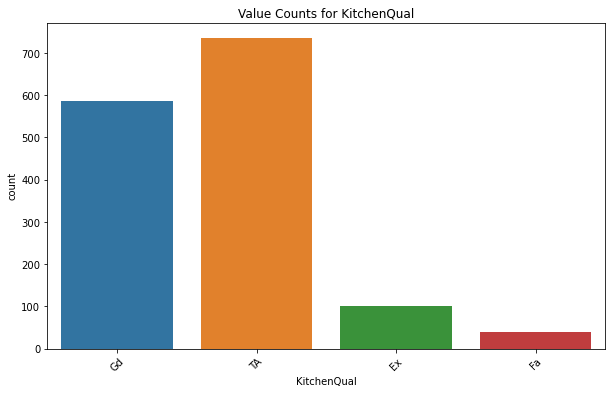

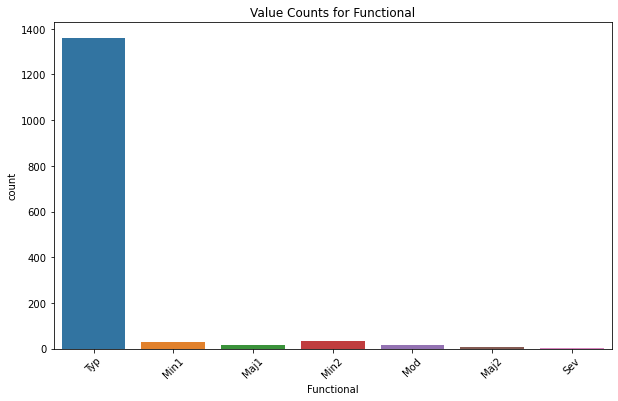

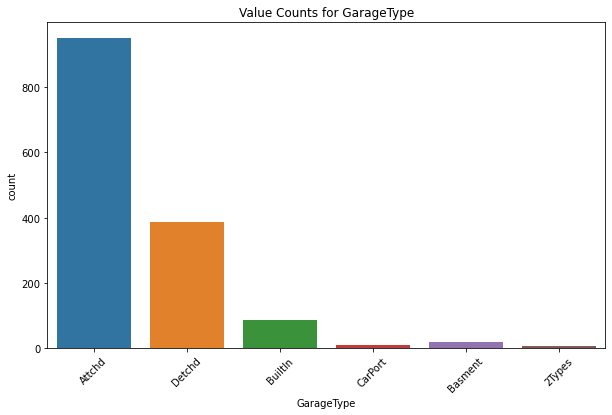

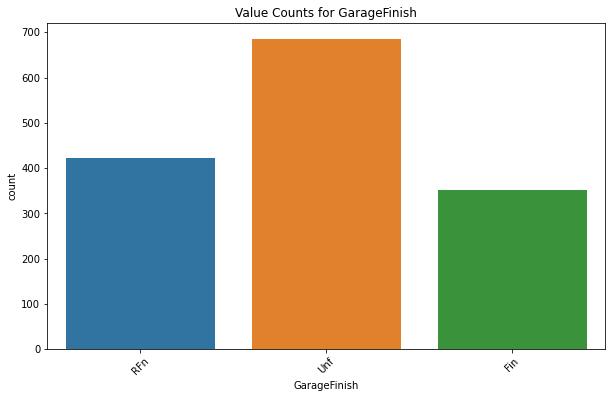

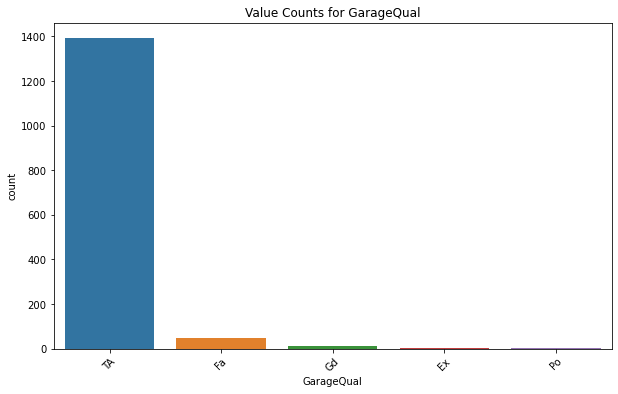

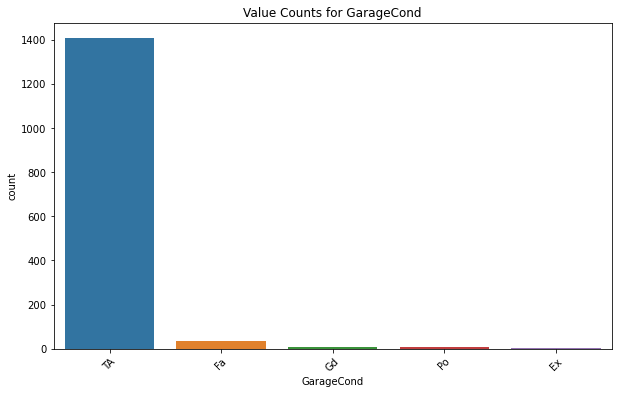

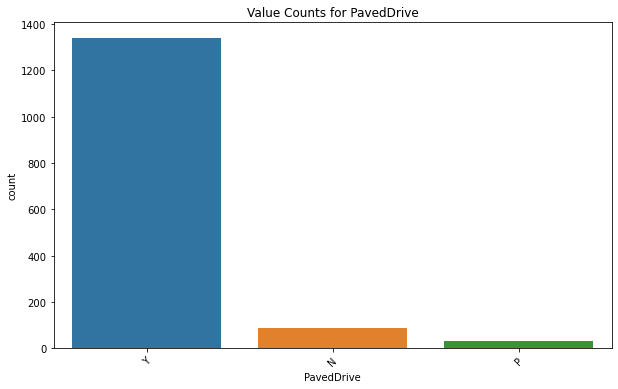

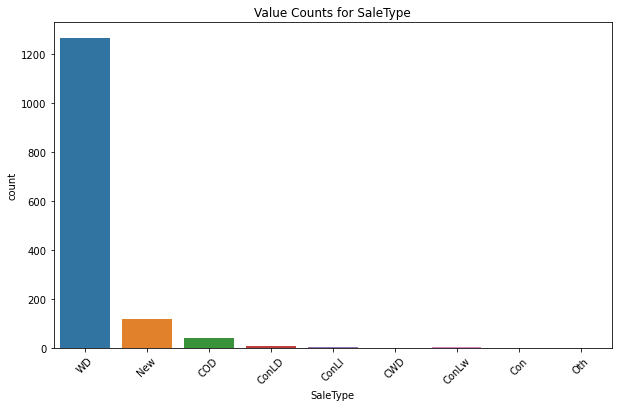

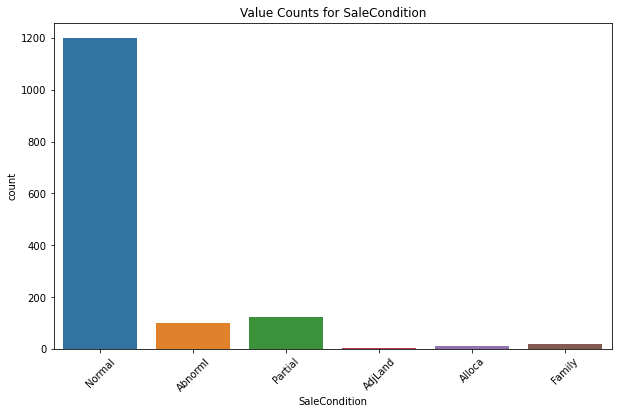

In [30]:
# Value Counts
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x=col)
    plt.title(f'Value Counts for {col}')
    plt.xticks(rotation=45)
    plt.show()

In [31]:
# skewed variables. Useless because of lack of diversity
print(train['Street'].value_counts(), '\n')
print(train['Utilities'].value_counts(),'\n')
print(train['Condition2'].value_counts(), '\n')
print(train['RoofMatl'].value_counts(), '\n')
print(train['Heating'].value_counts(), '\n')

Street
Pave    1454
Grvl       6
Name: count, dtype: int64 

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64 

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64 

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64 

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64 



In [32]:
# List of variables to remove
variables_to_remove = ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']

# Remove variables from the categorical_cols list
for var in variables_to_remove:
    if var in categorical_cols:
        categorical_cols.remove(var)

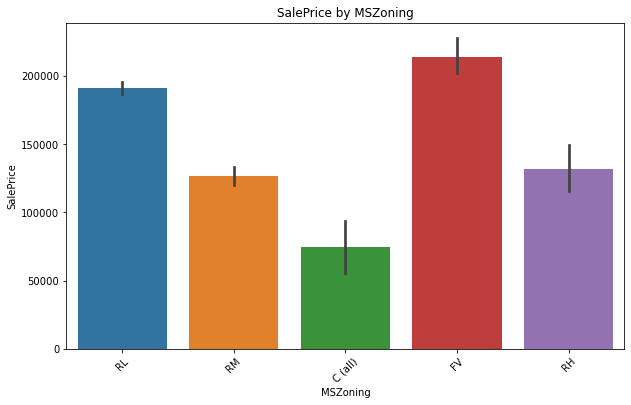

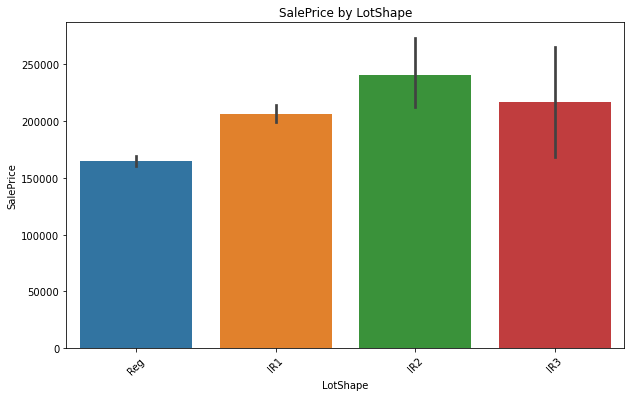

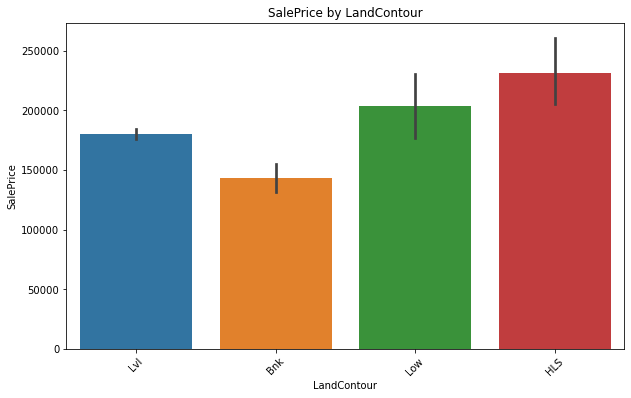

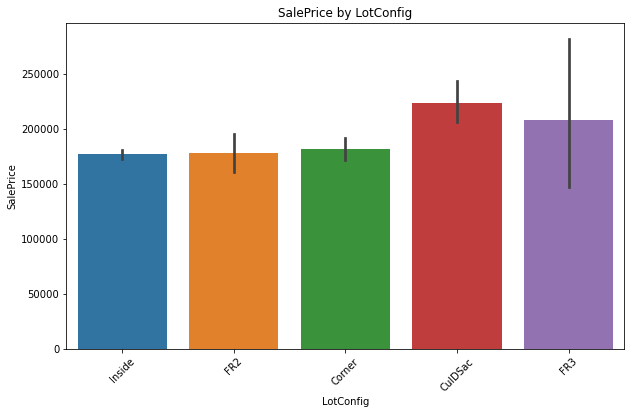

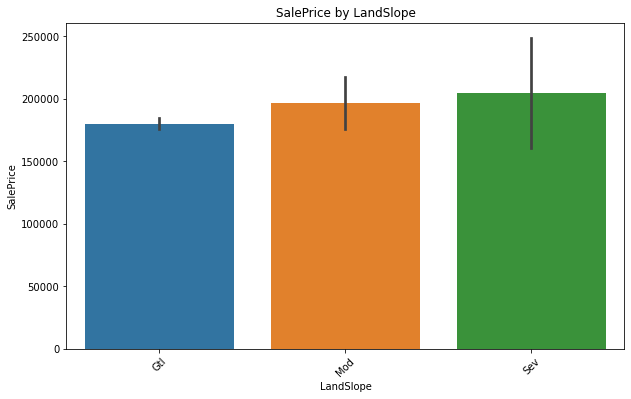

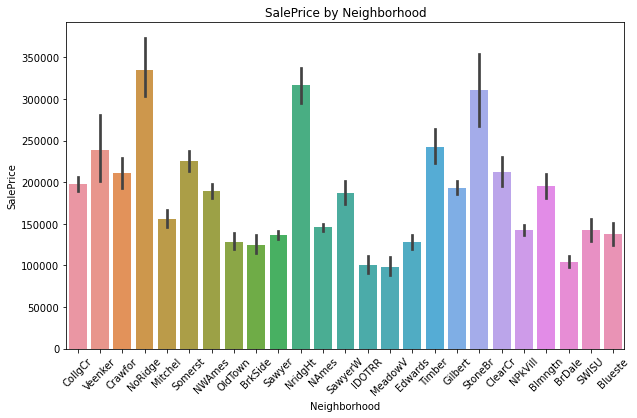

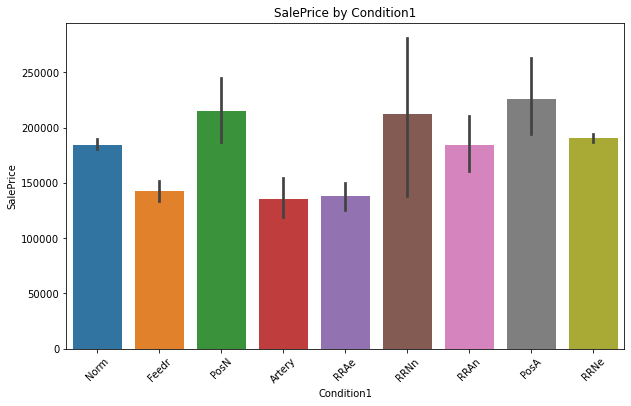

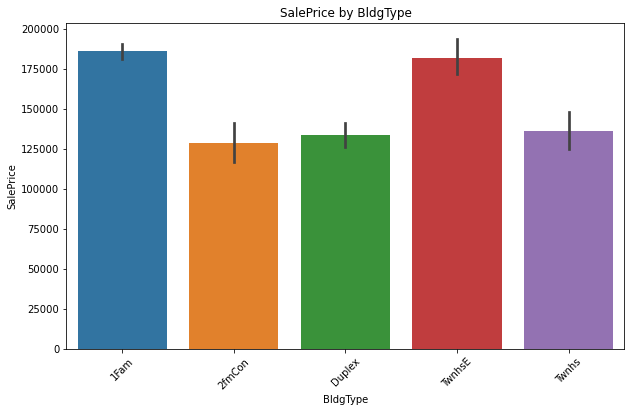

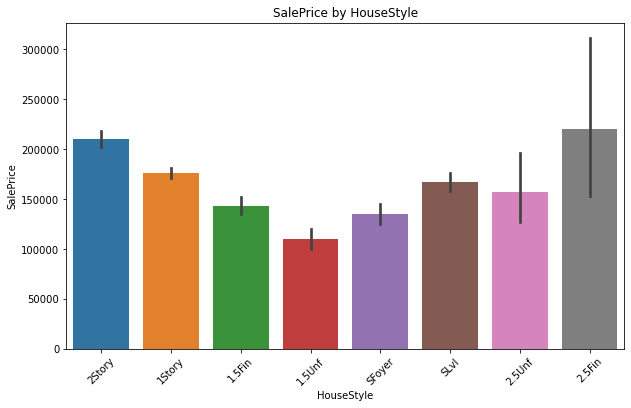

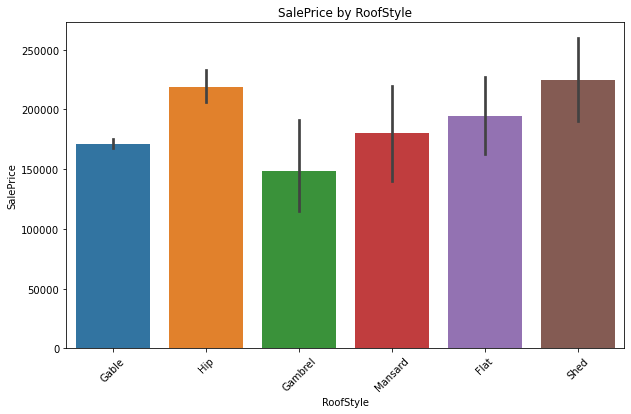

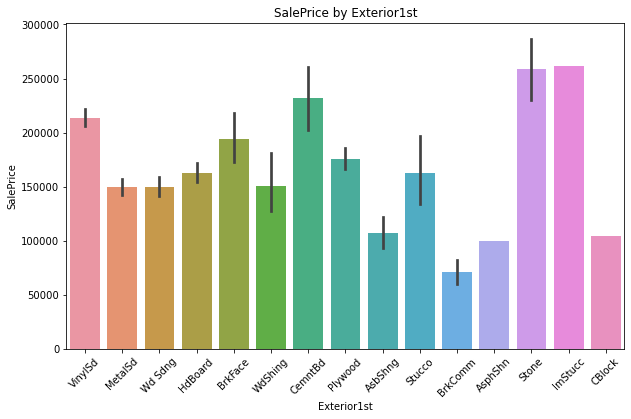

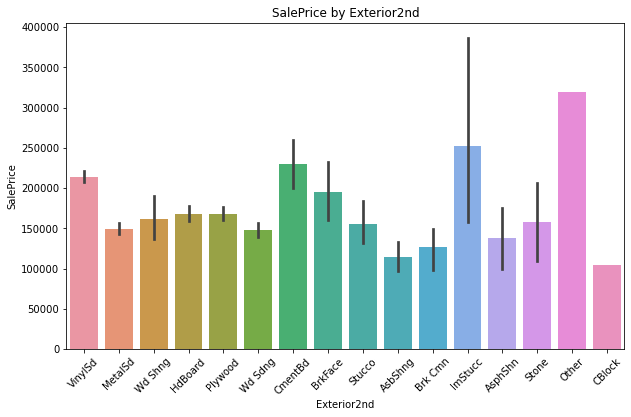

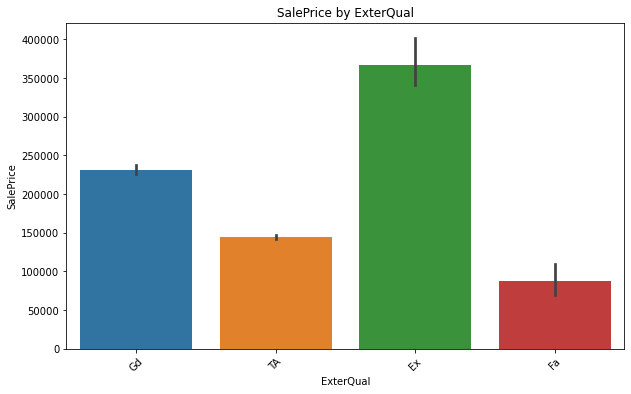

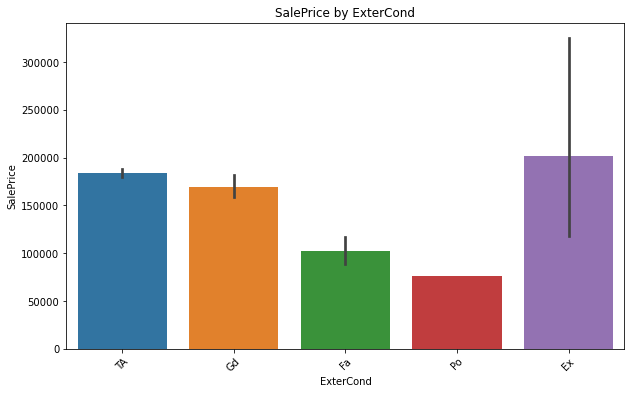

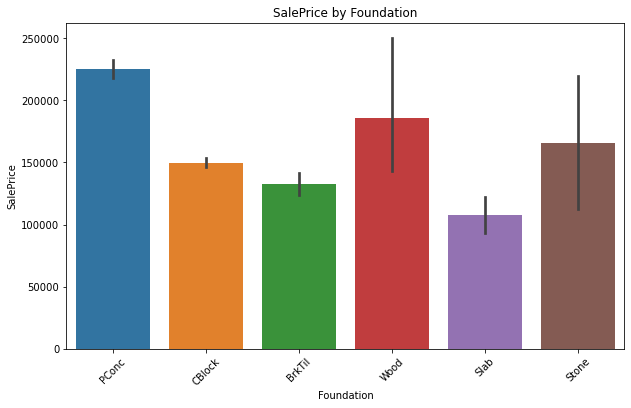

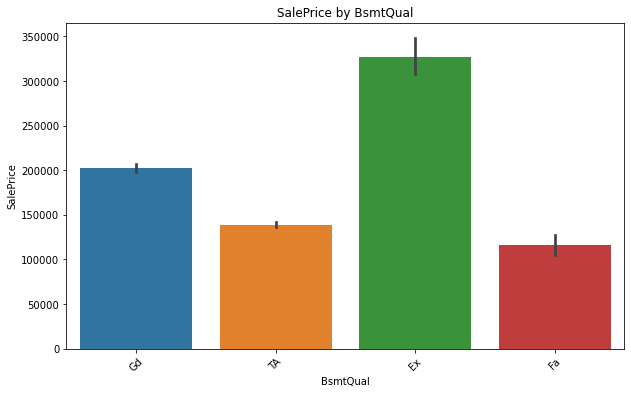

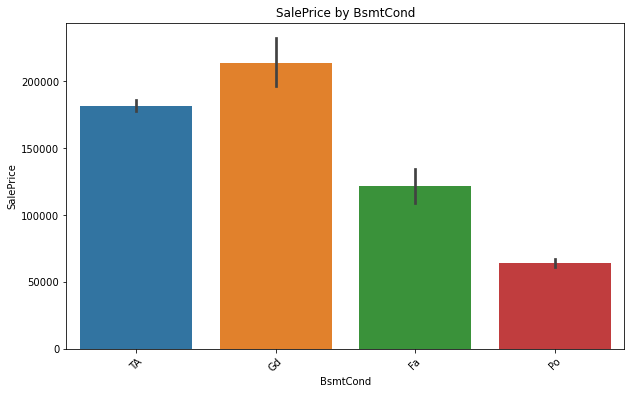

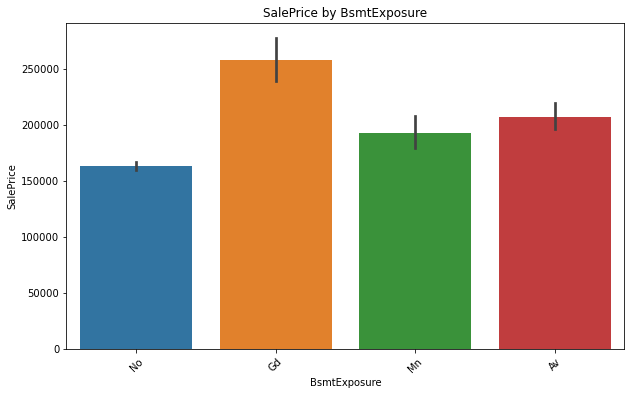

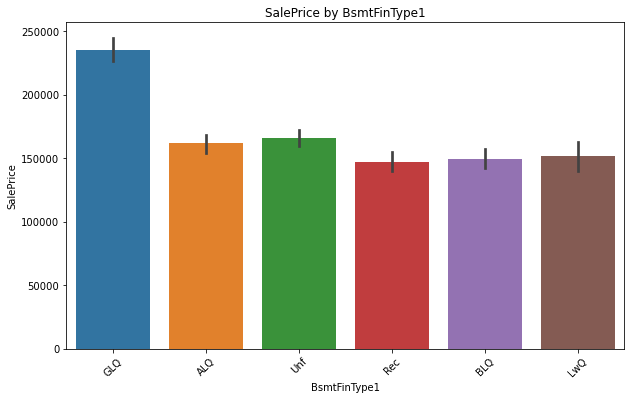

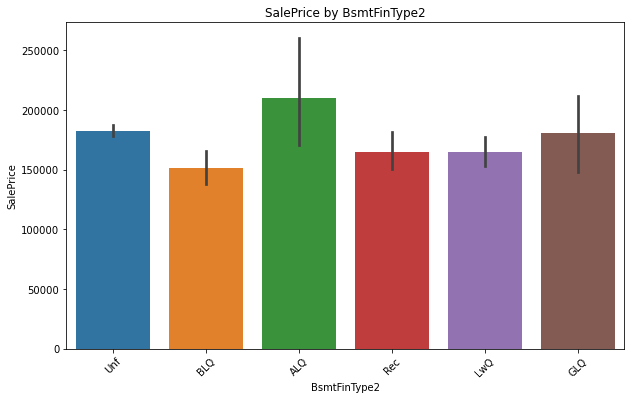

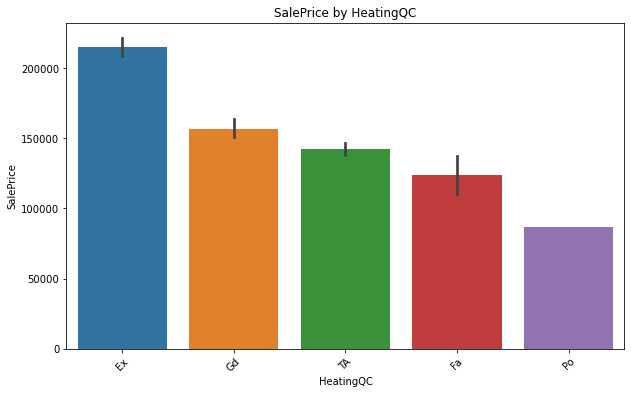

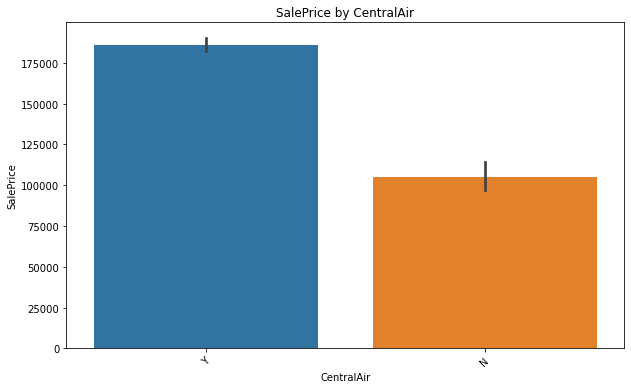

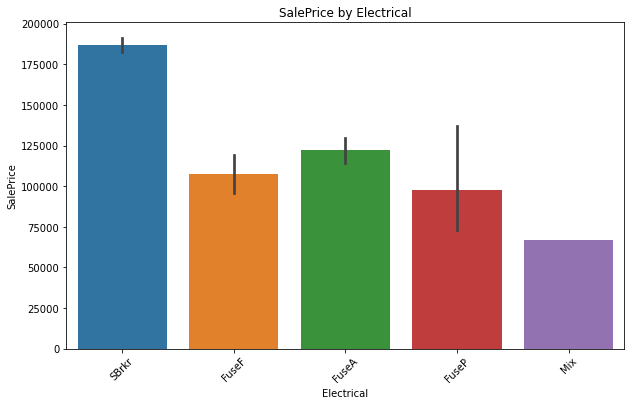

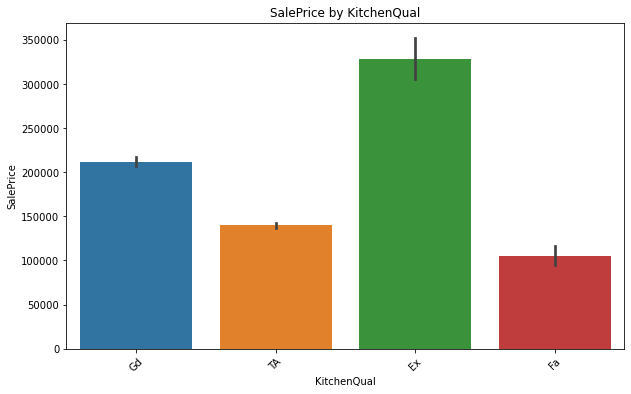

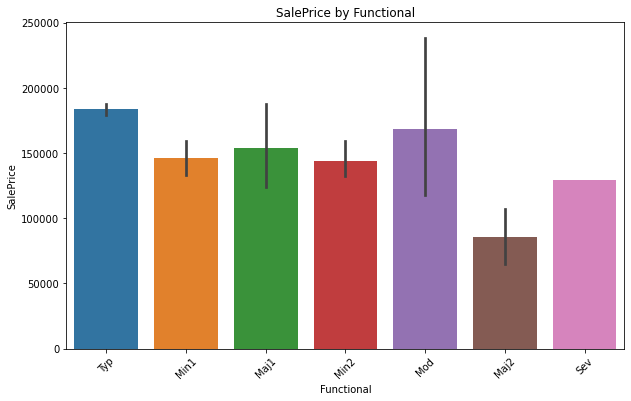

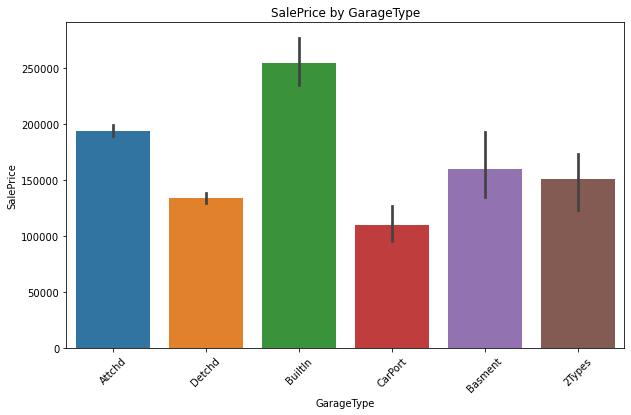

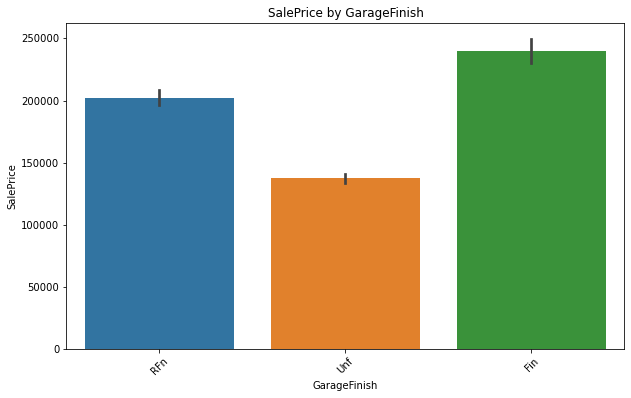

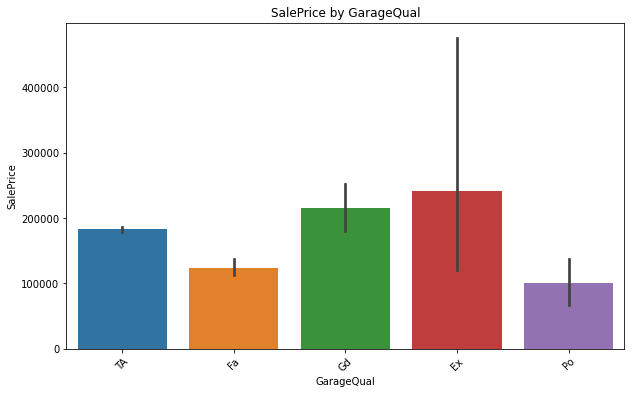

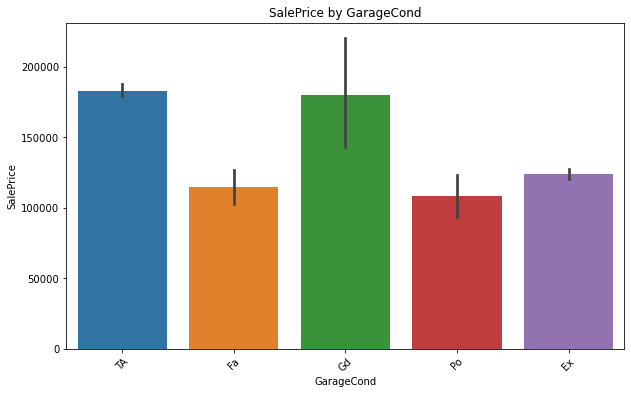

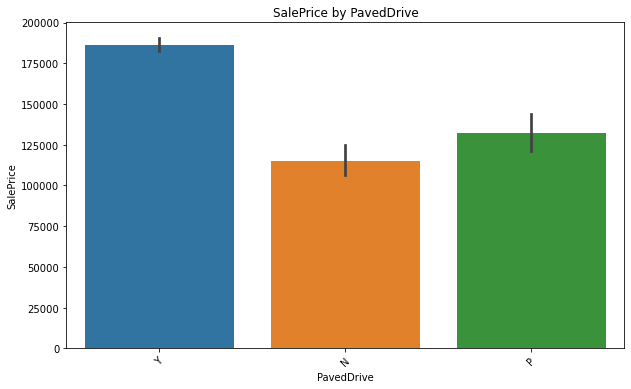

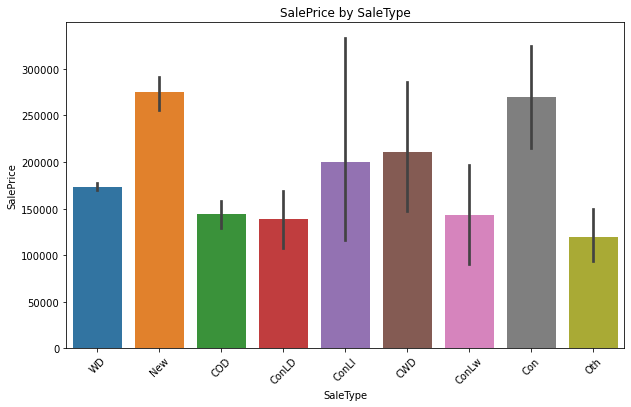

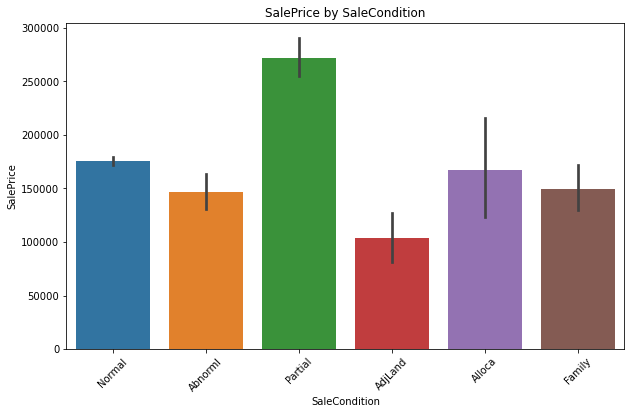

In [33]:
# Group Statistics
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=train, x=col, y='SalePrice')
    plt.title(f'SalePrice by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [41]:
# Seperate ordinal vs nominal variables
ordinal_vars = ['LandSlope', 'HeatingQC']
nominal_vars = [var for var in categorical_cols if var not in ordinal_vars]

In [42]:
nominal_vars

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encode Ordinal Variables
label_encoders = {}
for var in ordinal_vars:
    label_encoders[var] = LabelEncoder()
    train[var] = label_encoders[var].fit_transform(train[var])

# One-Hot Encode Nominal Variables
X_nominal = pd.get_dummies(train[nominal_vars], drop_first=True)

# Combine Encoded Variables
X = pd.concat([train[ordinal_vars], X_nominal], axis=1)

# Fit XGBoost Model
xgb_model = XGBRegressor()
xgb_model.fit(X, y)

# Retrieve Feature Importance
feature_importances = xgb_model.feature_importances_

# Pair feature names with their importances
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

ExterQual_TA: 0.3652014136314392
RoofStyle_Hip: 0.06547625362873077
ExterQual_Fa: 0.03756503760814667
GarageFinish_Unf: 0.03721800819039345
Neighborhood_NoRidge: 0.0302965696901083
BsmtQual_TA: 0.027803299948573112
BsmtQual_Gd: 0.025840243324637413
KitchenQual_TA: 0.02476852387189865
BsmtExposure_Gd: 0.02446991205215454
Neighborhood_MeadowV: 0.014748256653547287
KitchenQual_Gd: 0.013124880380928516
Neighborhood_ClearCr: 0.01211619097739458
Neighborhood_Crawfor: 0.011973554268479347
CentralAir_Y: 0.009458070620894432
MSZoning_RM: 0.009347841143608093
Neighborhood_NridgHt: 0.009212481789290905
Neighborhood_Edwards: 0.009137981571257114
Neighborhood_StoneBr: 0.008637948893010616
HouseStyle_2Story: 0.008335800841450691
Exterior1st_BrkFace: 0.007985038682818413
HouseStyle_2.5Fin: 0.007797089871019125
BsmtFinType1_GLQ: 0.006923202890902758
MSZoning_RL: 0.006778741721063852
GarageType_BuiltIn: 0.006594392005354166
Neighborhood_Timber: 0.006365216802805662
BldgType_TwnhsE: 0.005763668101280928

In [86]:
high_feature_cat = [feature.split('_')[0] for feature, importance in sorted_feature_importances if importance > 0.005]
high_feature_cat = set(high_feature_cat)
high_feature_cat

{'BldgType',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtQual',
 'CentralAir',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'HouseStyle',
 'KitchenQual',
 'LandSlope',
 'MSZoning',
 'Neighborhood',
 'RoofStyle',
 'SaleType'}

In [87]:
best_feature_num = list(common_elements)
best_feature_cat = list(high_feature_cat)

In [88]:
best_features = best_feature_num + best_feature_cat
best_features

['TotalBsmtSF',
 '1stFlrSF',
 'GarageCars',
 'YearRemodAdd',
 'OverallQual',
 'YearBuilt',
 'FullBath',
 'GarageArea',
 'GrLivArea',
 'Fireplaces',
 'ExterQual',
 'RoofStyle',
 'BsmtExposure',
 'BsmtQual',
 'KitchenQual',
 'MSZoning',
 'BsmtFinType1',
 'SaleType',
 'GarageQual',
 'Exterior2nd',
 'Exterior1st',
 'Neighborhood',
 'GarageType',
 'BldgType',
 'GarageFinish',
 'LandSlope',
 'CentralAir',
 'HouseStyle']

In [90]:
final_train = train[best_features]
final_train.head()

,TotalBsmtSF,1stFlrSF,GarageCars,YearRemodAdd,OverallQual,YearBuilt,FullBath,GarageArea,GrLivArea,Fireplaces,...,GarageQual,Exterior2nd,Exterior1st,Neighborhood,GarageType,BldgType,GarageFinish,LandSlope,CentralAir,HouseStyle
0,856,856,2,2003,7,2003,2,548,1710,0,...,TA,VinylSd,VinylSd,CollgCr,Attchd,1Fam,RFn,0,Y,2Story
1,1262,1262,2,1976,6,1976,2,460,1262,1,...,TA,MetalSd,MetalSd,Veenker,Attchd,1Fam,RFn,0,Y,1Story
2,920,920,2,2002,7,2001,2,608,1786,1,...,TA,VinylSd,VinylSd,CollgCr,Attchd,1Fam,RFn,0,Y,2Story
3,756,961,3,1970,7,1915,1,642,1717,1,...,TA,Wd Shng,Wd Sdng,Crawfor,Detchd,1Fam,Unf,0,Y,2Story
4,1145,1145,3,2000,8,2000,2,836,2198,1,...,TA,VinylSd,VinylSd,NoRidge,Attchd,1Fam,RFn,0,Y,2Story


In [91]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TotalBsmtSF   1460 non-null   int64 
 1   1stFlrSF      1460 non-null   int64 
 2   GarageCars    1460 non-null   int64 
 3   YearRemodAdd  1460 non-null   int64 
 4   OverallQual   1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
 6   FullBath      1460 non-null   int64 
 7   GarageArea    1460 non-null   int64 
 8   GrLivArea     1460 non-null   int64 
 9   Fireplaces    1460 non-null   int64 
 10  ExterQual     1460 non-null   object
 11  RoofStyle     1460 non-null   object
 12  BsmtExposure  1460 non-null   object
 13  BsmtQual      1460 non-null   object
 14  KitchenQual   1460 non-null   object
 15  MSZoning      1460 non-null   object
 16  BsmtFinType1  1460 non-null   object
 17  SaleType      1460 non-null   object
 18  GarageQual    1460 non-null   object
 19  Exteri

We've reduced our variables from almost 80 to 27 with the use of feature selection methods.

## Data Preprocessing

In [103]:
final_train = pd.get_dummies(final_train, drop_first=True, dtype=int)
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 121 entries, TotalBsmtSF to HouseStyle_SLvl
dtypes: int64(121)
memory usage: 1.3 MB


In [109]:
final_train.head()

,TotalBsmtSF,1stFlrSF,GarageCars,YearRemodAdd,OverallQual,YearBuilt,FullBath,GarageArea,GrLivArea,Fireplaces,...,GarageFinish_RFn,GarageFinish_Unf,CentralAir_Y,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,856,856,2,2003,7,2003,2,548,1710,0,...,1,0,1,0,0,0,0,1,0,0
1,1262,1262,2,1976,6,1976,2,460,1262,1,...,1,0,1,0,1,0,0,0,0,0
2,920,920,2,2002,7,2001,2,608,1786,1,...,1,0,1,0,0,0,0,1,0,0
3,756,961,3,1970,7,1915,1,642,1717,1,...,0,1,1,0,0,0,0,1,0,0
4,1145,1145,3,2000,8,2000,2,836,2198,1,...,1,0,1,0,0,0,0,1,0,0


In [110]:
# Baseline model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(final_train, y, test_size=0.2, random_state=22)
X_train.shape, X_test.shape

((1168, 121), (292, 121))

In [112]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling

In [113]:
from sklearn.linear_model import LinearRegression

In [115]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = lr.predict(X_test)

In [117]:
from sklearn.metrics import r2_score, mean_squared_error

In [118]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2

(28352.717617167185, 0.8689008449561323)

87% of the variance in house price is explainable by our baseline model. On average, our predictions are off by $28,000.

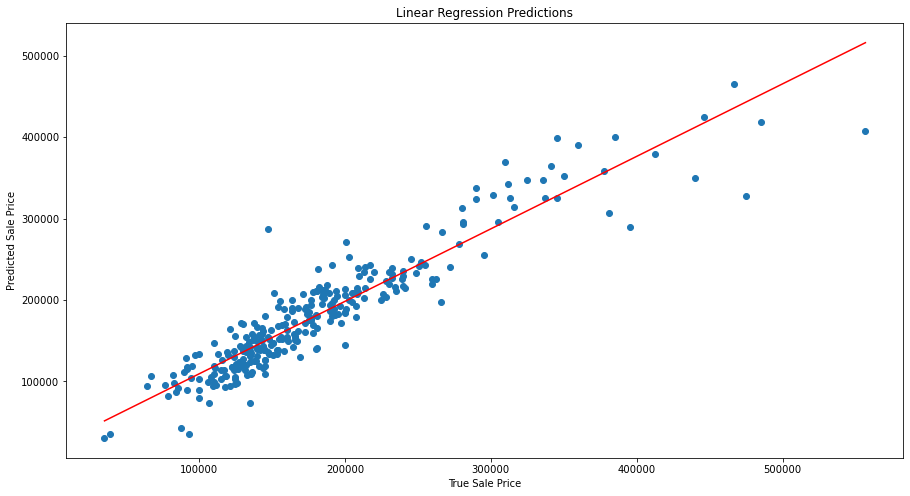

In [127]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test, y_pred)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.title('Linear Regression Predictions')
plt.xlabel('True Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

## Random Forest

In [129]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
rf = RandomForestRegressor(random_state=22)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=22)

In [133]:
y_pred = rf.predict(X_test)

In [134]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

rmse_rf, r2_rf

(25720.338317782436, 0.8921143055665735)

### Hyperparameter Search

In [138]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [139]:
rf = RandomForestRegressor(random_state=22)

In [140]:
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit the RandomizedSearchCV model
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=22),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   random_state=42)

In [141]:
# Get the best estimator from the search
best_rf = random_search.best_estimator_
best_rf

RandomForestRegressor(max_depth=40, n_estimators=300, random_state=22)

In [142]:
# Calculate RMSE and R^2 score
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("RMSE:", rmse_rf)
print("R^2 Score:", r2_rf)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40}
RMSE: 25720.338317782436
R^2 Score: 0.8921143055665735


## XGBoost

In [145]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [146]:
y_pred = xgb.predict(X_test)

In [147]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)

rmse_xgb, r2_xgb

(29122.761426600693, 0.8616829835095974)

In [149]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7, 9, 12],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit the RandomizedSearchCV model
random_search.fit(X_train, y_train)

# Get the best estimator from the search
best_xgb = random_search.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)

# Calculate RMSE and R^2 score
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgb = r2_score(y_test, y_pred)

print("Best Parameters:", random_search.best_params_)
print("RMSE:", rmse_xgb)
print("R^2 Score:", r2_xgb)


Best Parameters: {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
RMSE: 25044.147102477255
R^2 Score: 0.8977123974220051


This XGBoost model is our best performing

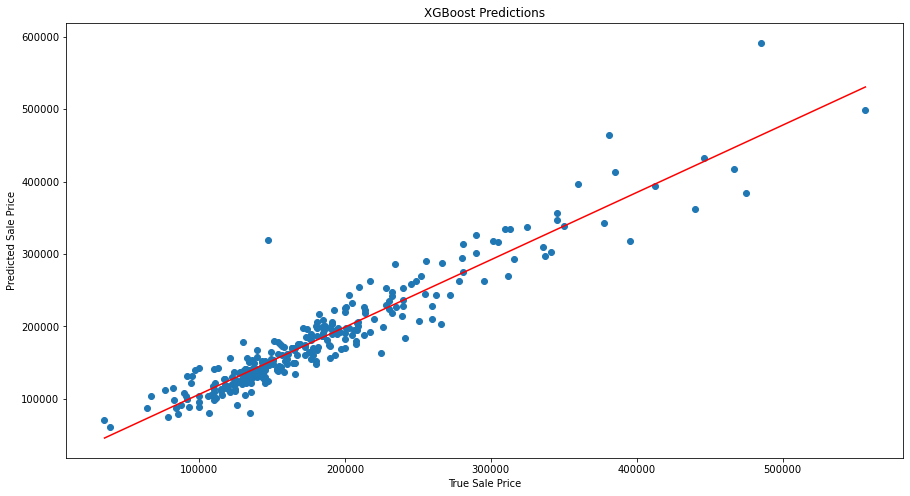

In [150]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test, y_pred)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')
plt.title('XGBoost Predictions')
plt.xlabel('True Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

# Submitting Predictions

In [214]:
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [185]:
numerical_cols.remove('SalePrice')

ValueError: list.remove(x): x not in list

In [215]:
# Calculate the median for numerical columns and fill missing values with the median
for col in numerical_cols:
    median = test[col].median()
    test[col].fillna(median, inplace=True)

# Calculate the mode for categorical columns and fill missing values with the mode
for col in categorical_cols:
    mode = test[col].mode()[0]  # mode() returns a Series, select the first element
    test[col].fillna(mode, inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [216]:
label_encoders = {}
for var in ordinal_vars:
    label_encoders[var] = LabelEncoder()
    test[var] = label_encoders[var].fit_transform(test[var])

In [217]:
desired_order = ['TotalBsmtSF', '1stFlrSF', 'GarageCars', 'YearRemodAdd', 'OverallQual', 'YearBuilt', 
                 'FullBath', 'GarageArea', 'GrLivArea', 'Fireplaces', 'ExterQual', 'RoofStyle', 
                 'BsmtExposure', 'BsmtQual', 'KitchenQual', 'MSZoning', 'BsmtFinType1', 'SaleType', 
                 'GarageQual', 'Exterior2nd', 'Exterior1st', 'Neighborhood', 'GarageType', 'BldgType', 
                 'GarageFinish', 'LandSlope', 'CentralAir', 'HouseStyle']

final_test = test[desired_order]
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalBsmtSF   1459 non-null   float64
 1   1stFlrSF      1459 non-null   int64  
 2   GarageCars    1459 non-null   float64
 3   YearRemodAdd  1459 non-null   int64  
 4   OverallQual   1459 non-null   int64  
 5   YearBuilt     1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   GarageArea    1459 non-null   float64
 8   GrLivArea     1459 non-null   int64  
 9   Fireplaces    1459 non-null   int64  
 10  ExterQual     1459 non-null   object 
 11  RoofStyle     1459 non-null   object 
 12  BsmtExposure  1459 non-null   object 
 13  BsmtQual      1459 non-null   object 
 14  KitchenQual   1459 non-null   object 
 15  MSZoning      1459 non-null   object 
 16  BsmtFinType1  1459 non-null   object 
 17  SaleType      1459 non-null   object 
 18  GarageQual    1459 non-null 

In [223]:
final_test = pd.get_dummies(final_test, drop_first=True, dtype=int)
final_test = final_test.align(final_train, axis=1, fill_value=0)[0]
final_test.head()

,1stFlrSF,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,TotalBsmtSF,YearBuilt,YearRemodAdd
0,896,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,882.0,1961,1961
1,1329,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1329.0,1958,1958
2,928,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,928.0,1997,1998
3,926,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,926.0,1998,1998
4,1280,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1280.0,1992,1992


In [219]:
# Get the ordered feature names from the scaler
ordered_feature_names = sc.get_feature_names_out()

# Reorder the columns of the test data based on the ordered feature names
final_test_ordered = final_test[ordered_feature_names]

In [222]:
final_test_ordered.head()

,TotalBsmtSF,1stFlrSF,GarageCars,YearRemodAdd,OverallQual,YearBuilt,FullBath,GarageArea,GrLivArea,Fireplaces,...,GarageFinish_RFn,GarageFinish_Unf,CentralAir_Y,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,882.0,896,1.0,1961,5,1961,1,730.0,896,0,...,0,1,1,0,1,0,0,0,0,0
1,1329.0,1329,1.0,1958,6,1958,1,312.0,1329,0,...,0,1,1,0,1,0,0,0,0,0
2,928.0,928,2.0,1998,5,1997,2,482.0,1629,1,...,0,0,1,0,0,0,0,1,0,0
3,926.0,926,2.0,1998,6,1998,2,470.0,1604,1,...,0,0,1,0,0,0,0,1,0,0
4,1280.0,1280,2.0,1992,8,1992,2,506.0,1280,0,...,1,0,1,0,1,0,0,0,0,0


In [225]:
final_test = sc.transform(final_test_ordered)

In [226]:
final_preds = best_xgb.predict(final_test)

In [227]:
sub = pd.read_csv('house-prices-advanced-regression-techniques/sample_submission.csv')
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [228]:
sub.drop('SalePrice', axis=1, inplace=True)
sub.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [229]:
sub['SalePrice'] = final_preds
sub.head()

,Id,SalePrice
0,1461,117920.984375
1,1462,151074.265625
2,1463,175404.500000
3,1464,190990.906250
4,1465,189922.109375


In [230]:
sub.to_csv('House_Preds.csv')